Applicant Details:
   Gender  Age  Income  LoanAmount
0    Male   28   45000      120000
1  Female   35   60000      200000
2    Male   42   80000      250000
3  Female   29   50000      180000
4    Male   38   75000      220000
5  Female   33   62000      210000
6    Male   45   90000      300000
7  Female   31   55000      170000
8    Male   40   85000      260000
9  Female   27   48000      150000


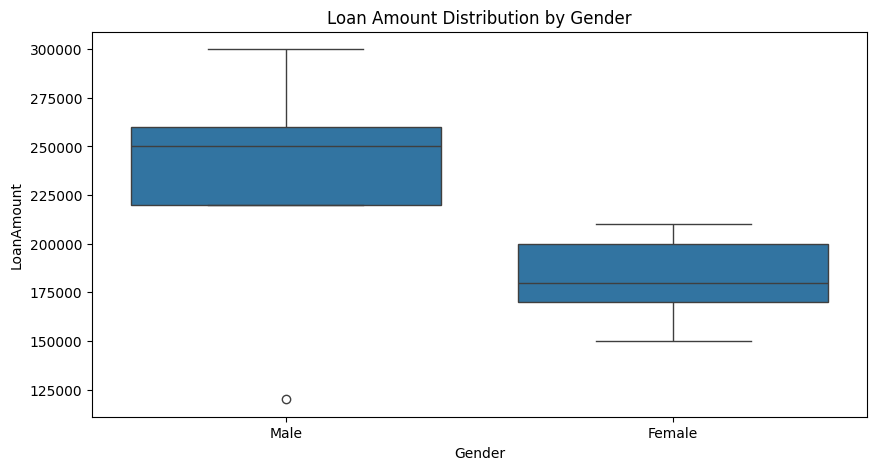

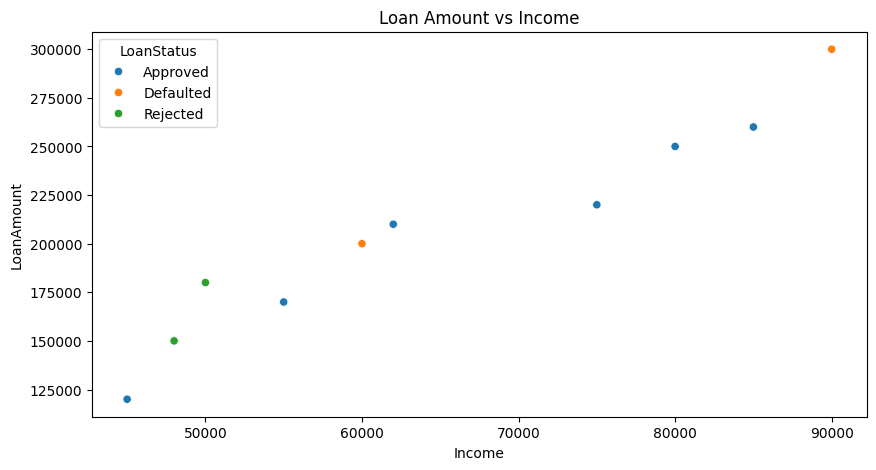

/tmp/ipython-input-4037138759.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['LoanStatus']=='Defaulted']['LoanAmount'], label='Defaulted', shade=True)
/tmp/ipython-input-4037138759.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data[data['LoanStatus']=='Approved']['LoanAmount'], label='Approved', shade=True)


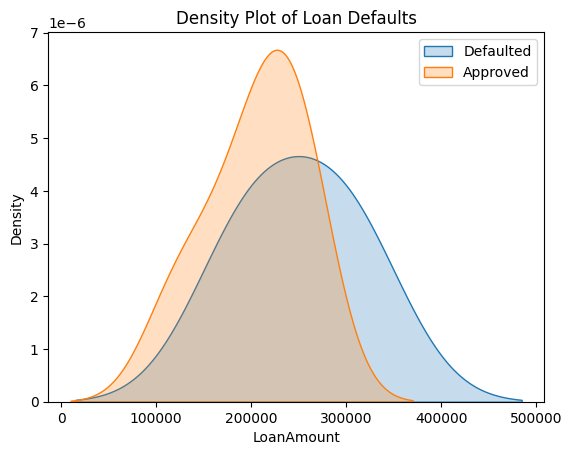

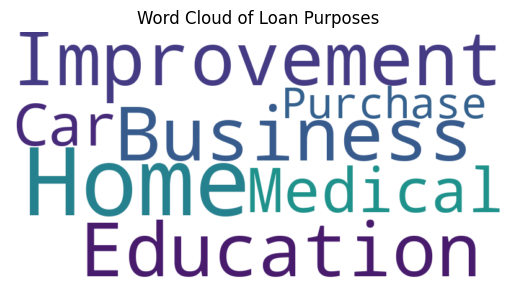

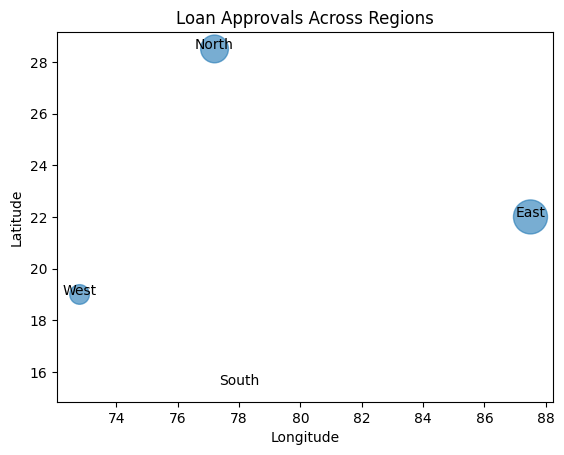

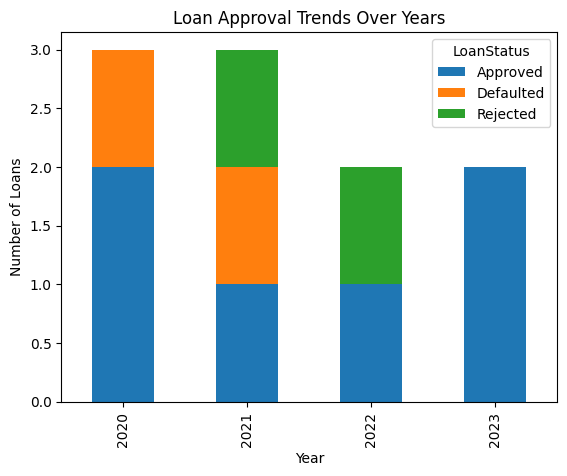

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import geopandas as gpd

# Load dataset
data = pd.read_csv("/content/bank_loan_data.csv")

# 1️⃣ Show details of applicants
print("Applicant Details:")
print(data[['Gender', 'Age', 'Income', 'LoanAmount']])

# 2️⃣ Box plots and density plots
plt.figure(figsize=(10, 5))
sns.boxplot(x='Gender', y='LoanAmount', data=data)
plt.title("Loan Amount Distribution by Gender")
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Income', y='LoanAmount', hue='LoanStatus', data=data)
plt.title("Loan Amount vs Income")
plt.show()

sns.kdeplot(data=data[data['LoanStatus']=='Defaulted']['LoanAmount'], label='Defaulted', shade=True)
sns.kdeplot(data=data[data['LoanStatus']=='Approved']['LoanAmount'], label='Approved', shade=True)
plt.title("Density Plot of Loan Defaults")
plt.legend()
plt.show()

# 3️⃣ Word Cloud from Loan Purposes
text = " ".join(data['LoanPurpose'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Loan Purposes")
plt.show()

# 4️⃣ Choropleth Map (using sample data)
region_data = data.groupby('Region')['LoanStatus'].apply(lambda x: (x=='Approved').sum()).reset_index(name='ApprovedLoans')
# Dummy coordinates for simplicity
map_df = pd.DataFrame({
    'Region': ['North','South','East','West'],
    'Latitude':[28.5, 15.5, 22.0, 19.0],
    'Longitude':[77.2, 78.0, 87.5, 72.8]
}).merge(region_data, on='Region')

plt.scatter(map_df['Longitude'], map_df['Latitude'], s=map_df['ApprovedLoans']*200, alpha=0.6)
for i, row in map_df.iterrows():
    plt.text(row['Longitude'], row['Latitude'], row['Region'], fontsize=10, ha='center')
plt.title("Loan Approvals Across Regions")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# 5️⃣ Loan Approval Trends over Years
trend = data.groupby(['Year', 'LoanStatus']).size().unstack(fill_value=0)
trend.plot(kind='bar', stacked=True)
plt.title("Loan Approval Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Loans")
plt.show()
